<a href="https://colab.research.google.com/github/thisishasan/slda/blob/hasan/slda_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment no. 04 - Classification Analysis Framework
## Submitted by: Muhammad Hasan (ID: D03000134)

## Import all necessary libraries

In [623]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import zipfile
from scipy.stats import mannwhitneyu, ttest_ind, skew, kurtosis, shapiro, kstest, anderson, chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

## Download and load the dataset into dataframe for data analysis

In [624]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
dataset_path = 'processed_cleveland.csv'
urllib.request.urlretrieve(url, dataset_path)
df = pd.read_csv(dataset_path, names=column_names)

In [625]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

## Intitial Analysis of the dataset

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [627]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [628]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [629]:
df.shape

(303, 14)

## Preparation for Exploratory Data Analysis (EDA)

### Checking Missing values

"ca" and "thal" variables have missing values


In [630]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### Examing unique values in the dataset



In [631]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,50
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


### Identify numeric variables and categorical variables by number of unique counts

Variables having high unique counts are considered as Numeric variables whereas variables having low unique counts are considered as Categorical variables

In [632]:
numeric_var = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target_var = ["target"]

# Exploratory Data Analysis

## Univariate Analysis of Numeric Variables

In [633]:
df[numeric_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [634]:
numerical_analysis = {}

for column in numeric_var:
    data = df[column].dropna()
    skewness = data.skew()
    kurtois = data.kurt()
    numerical_analysis[column] = {
        "Skewness": skewness,
        "Skewness Type": "Symmetric (Normal)" if skewness == 0 else "Right-Skewed (Positive)" if skewness > 0 else "Left-Skewed (Negative)",
        "Kurtosis": kurtois,
        "Type of Kurtosis": "Leptokurtic (High)" if kurtois > 3 else "Platykurtic (Low)" if kurtois < 3 else "Mesokurtic (Normal)",
    }

numerical_analysis_df = pd.DataFrame(numerical_analysis)
display(numerical_analysis_df.T)

,Skewness,Skewness Type,Kurtosis,Type of Kurtosis
age,-0.20906,Left-Skewed (Negative),-0.523383,Platykurtic (Low)
trestbps,0.706035,Right-Skewed (Positive),0.880074,Platykurtic (Low)
chol,1.135503,Right-Skewed (Positive),4.491724,Leptokurtic (High)
thalach,-0.537449,Left-Skewed (Negative),-0.053541,Platykurtic (Low)
oldpeak,1.26972,Right-Skewed (Positive),1.575813,Platykurtic (Low)


## Univariate Analysis of Categorical Variables

In [635]:
categorical_counts = {col: df[col].value_counts() for col in categoric_var}
for col, counts in categorical_counts.items():
    print(f"Category Counts for {col}:\n{counts}\n{'-'*40}")


Category Counts for sex:
sex
1.0    206
0.0     97
Name: count, dtype: int64
----------------------------------------
Category Counts for cp:
cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64
----------------------------------------
Category Counts for fbs:
fbs
0.0    258
1.0     45
Name: count, dtype: int64
----------------------------------------
Category Counts for restecg:
restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64
----------------------------------------
Category Counts for exang:
exang
0.0    204
1.0     99
Name: count, dtype: int64
----------------------------------------
Category Counts for slope:
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64
----------------------------------------
Category Counts for ca:
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
----------------------------------------
Category Counts for thal:
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64
------

In [636]:
categorical_counts = {col: df[col].value_counts() for col in categoric_var}
for col, counts in categorical_counts.items():
    print(f"Category Counts for {col}:\n{counts}\n{'-'*40}")

Category Counts for sex:
sex
1.0    206
0.0     97
Name: count, dtype: int64
----------------------------------------
Category Counts for cp:
cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64
----------------------------------------
Category Counts for fbs:
fbs
0.0    258
1.0     45
Name: count, dtype: int64
----------------------------------------
Category Counts for restecg:
restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64
----------------------------------------
Category Counts for exang:
exang
0.0    204
1.0     99
Name: count, dtype: int64
----------------------------------------
Category Counts for slope:
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64
----------------------------------------
Category Counts for ca:
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
----------------------------------------
Category Counts for thal:
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64
------

## Univariate analysis of Target variable

In [637]:
target_counts = df['target'].value_counts().reset_index()
target_counts.columns = ['Target Class', 'Count']
target_counts['Percentage'] = (target_counts['Count'] / target_counts['Count'].sum()) * 100
print(target_counts)

   Target Class  Count  Percentage
0             0    164   54.125413
1             1     55   18.151815
2             2     36   11.881188
3             3     35   11.551155
4             4     13    4.290429


## Bivariate Analysis of Categorical variables vs Target Variable

### Performed Chi-Square Test to check association between categorical variables and target variable

In [638]:
categorical_associations = []
significance_level = 0.05
for i, cat_var in enumerate(categoric_var):
    for tar_var in target_var:
        contingency_table = pd.crosstab(df[cat_var], df[tar_var])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_stat = chi2_stat.round(2)
        categorical_associations.append({
            "Categorical Variable": cat_var,
            "Target Variable": tar_var,
            "Chi-Square Statistic": chi2_stat,
            "p-value": p_value,
            "Association": "Significant" if p_value < significance_level else "Not Significant"
        })

categorical_associations_df = pd.DataFrame(categorical_associations)
display(categorical_associations_df)

,Categorical Variable,Target Variable,Chi-Square Statistic,p-value,Association
0,sex,target,23.43,1.041059e-04,Significant
1,cp,target,88.98,7.781947e-14,Significant
2,fbs,target,7.82,9.841684e-02,Not Significant
3,restecg,target,20.74,7.880178e-03,Significant
4,exang,target,61.69,1.279482e-12,Significant
5,slope,target,56.17,2.614777e-09,Significant
6,ca,target,109.92,6.201869e-18,Significant
7,thal,target,97.99,1.096475e-17,Significant


**Significant Associations (p-value < 0.05)**

The following categorical variables show a significant association with the target variable, meaning they contribute to predicting the target:

* sex (p-value = 1.04e-04) → Gender has an impact on the target.
* cp (p-value = 7.78e-14) → Chest pain type has a very strong association.
* restecg (p-value = 7.88e-03) → Resting ECG results are associated with the target.
* exang (p-value = 1.27e-12) → Exercise-induced angina strongly correlates with the target.
* slope (p-value = 2.61e-09) → The slope of the ST segment is significantly associated.
* ca (p-value = 6.20e-18) → Number of major vessels colored by fluoroscopy has a strong impact.
* thal (p-value = 6.21e-18) → Thalassemia type has a very strong association.

**Not Significant Associations (p-value > 0.05)**

* fbs (p-value = 9.84e-02) → Fasting blood sugar does not show a significant association with the target variable.

## Bivariate Analysis of Numeric Variables vs Target Variable

### Measuring Pearson Correlation Co-efficent to measure correlation between variables

In [639]:
df[numeric_var + target_var].corr()['target'].sort_values(ascending=False)

,target
target,1.000000
oldpeak,0.504092
age,0.222853
trestbps,0.157754
chol,0.070909
thalach,-0.415040


**oldpeak** has the highest positive correlation with target, meaning higher values might be associated with heart disease.

Other variables (**age, trestbps, chol, thalach**) have weak correlations, meaning they do not strongly determine the presence of heart disease.

# Feature reduction for predictive modelling

Reduced features according to the results of bivariate analysis.

Removed Numeric variables (**age, trestbps, chol, thalach**) because having a weak correlations with the target variable.

Categorical variable (**fbs**) has not a significant association with the target variable so removed it as well.

In [640]:
new_categorical_var = ['sex','cp','restecg','exang','slope','ca','thal']
new_numeric_var = ['oldpeak']

In [641]:
columns_to_keep = new_numeric_var + new_categorical_var + target_var
df = df[columns_to_keep]
df.head()

,oldpeak,sex,cp,restecg,exang,slope,ca,thal,target
0,2.3,1.0,1.0,2.0,0.0,3.0,0.0,6.0,0
1,1.5,1.0,4.0,2.0,1.0,2.0,3.0,3.0,2
2,2.6,1.0,4.0,2.0,1.0,2.0,2.0,7.0,1
3,3.5,1.0,3.0,0.0,0.0,3.0,0.0,3.0,0
4,1.4,0.0,2.0,2.0,0.0,1.0,0.0,3.0,0


# Model Building

## Filling missing values with median
If the feature has a right-skewed (positively skewed) or left-skewed (negatively skewed) distribution, the median is a better measure of central tendency than the mean.

In [642]:
df.fillna(df.median(), inplace=True)

<ipython-input-642-e2cd313b306c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(), inplace=True)


In [643]:
df.isnull().sum()

,0
oldpeak,0
sex,0
cp,0
restecg,0
exang,0
slope,0
ca,0
thal,0
target,0


## Seperate inputs and outputs from the dataset for model training

In [644]:
X = df.drop('target', axis=1)
y = df['target']

## Applying SMOTE to handle class imbalance

In [645]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

## Split training and testing datasets

In [646]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Start training and testing of models (***Logistic Regression, LDA, QDA and Decision Tree***)

In [647]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
    "QDA": QuadraticDiscriminantAnalysis(reg_param=0.1),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)

# Comparision of Model Performances

## Calculating performance metrics (Accuracy, Precision, Recall and F1 Score)

In [648]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("--------------------")

predictions = {}
for name, model in models.items():
    evaluate_model(model, X_test, y_test)
    predictions[name] = model.predict(X_test)

Accuracy: 0.5183
Precision: 0.5108
Recall: 0.5183
F1 Score: 0.5074
--------------------
Accuracy: 0.4634
Precision: 0.4616
Recall: 0.4634
F1 Score: 0.4590
--------------------
Accuracy: 0.6098
Precision: 0.6030
Recall: 0.6098
F1 Score: 0.5919
--------------------
Accuracy: 0.7134
Precision: 0.7253
Recall: 0.7134
F1 Score: 0.7154
--------------------


## Confusion Matrix

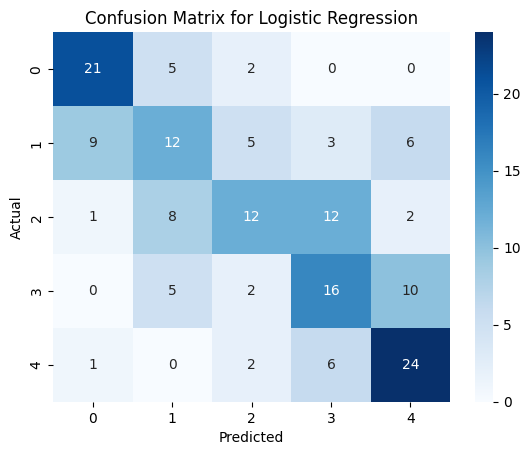

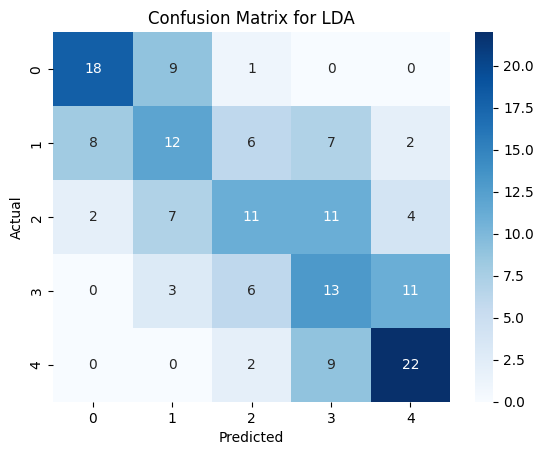

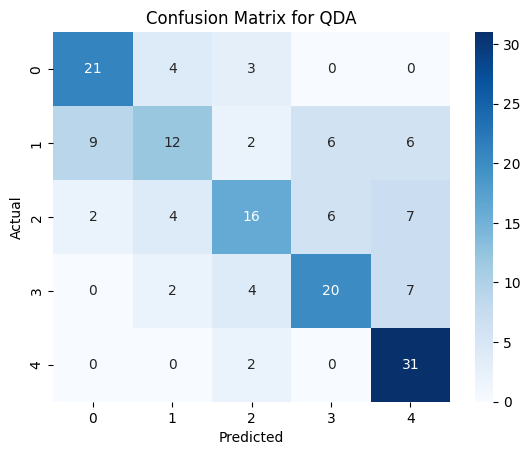

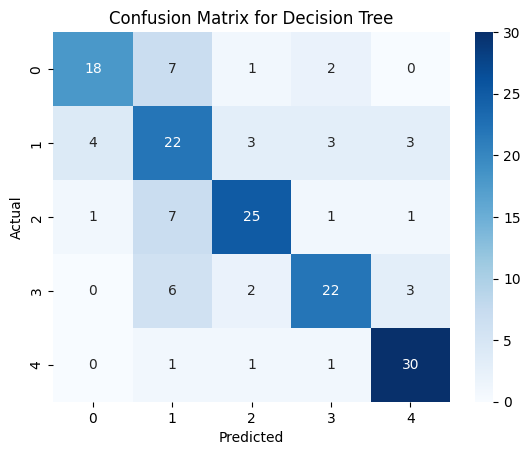

In [649]:
for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## ROC Curve and AUC

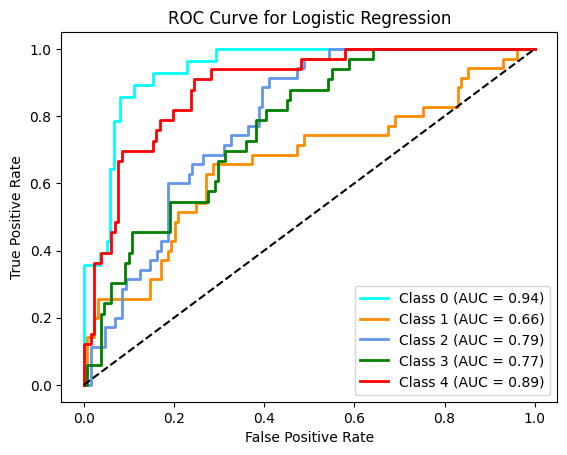

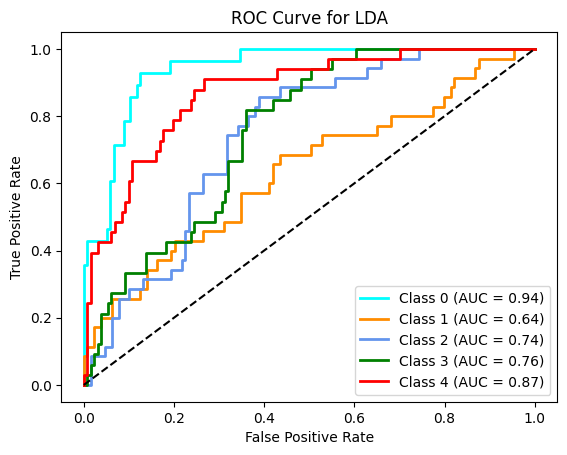

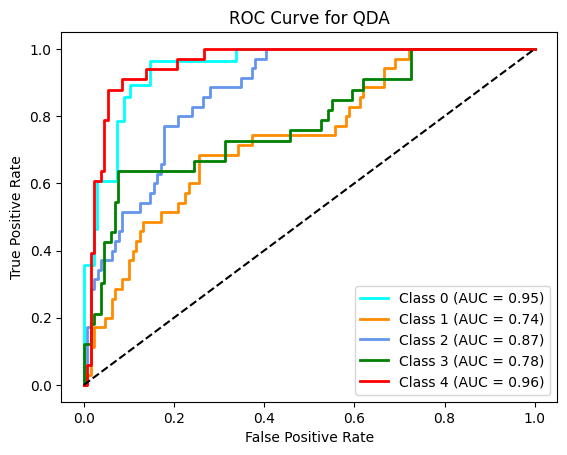

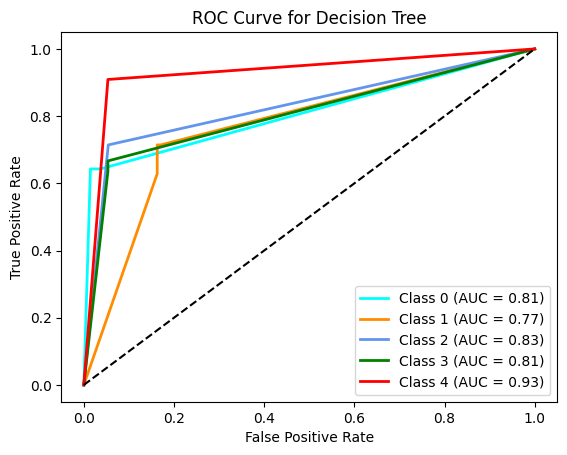

In [650]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_binarized.shape[1]
for name, model in models.items():
    y_score = model.predict_proba(X_test)
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()